# Assignment 2: Data Integration & Preparation

- Ilse van Deventer (9996974)
- Majdouline Hamdi (9767738)
- Zexuan Li (8069182)
- Zoé Ricardie (9107096)
- Menno Zoetbrood (1084720)

In [15]:
# Importing the required libraries for this assignment

import csv
from itertools import combinations
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import py_stringmatching as sm
import re
import seaborn as sns
import time

## Task 1: Profiling Relational Data

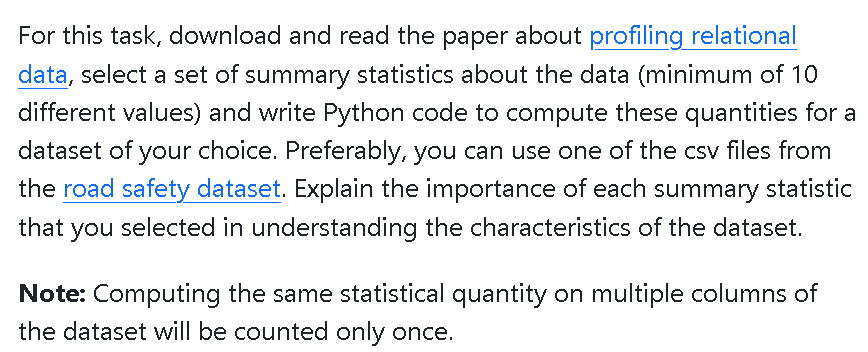

In [16]:
# Import Road Safety data (collisions) dataset
uk_road_collision_data_2024 = pd.read_csv(filepath_or_buffer = 'https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-collision-2024.csv',
                 delimiter=',', doublequote=True, quotechar='"',
                 na_values = ['na', '-', '.', ''],
                 quoting=csv.QUOTE_ALL, encoding = "ISO-8859-1")

print("\033[1m UK road collisions (2024) dataset\033[0m")
display(uk_road_collision_data_2024)

 UK road collisions (2024) dataset


/tmp/ipython-input-2836495727.py:2: DtypeWarning: Columns (0,2,39) have mixed types. Specify dtype option on import or set low_memory=False.
  uk_road_collision_data_2024 = pd.read_csv(filepath_or_buffer = 'https://data.dft.gov.uk/road-accidents-safety-data/dft-road-casualty-statistics-collision-2024.csv',


,collision_index,collision_year,collision_ref_no,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,collision_severity,number_of_vehicles,...,carriageway_hazards_historic,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,enhanced_severity_collision,collision_injury_based,collision_adjusted_severity_serious,collision_adjusted_severity_slight
0,202417H103224,2024,17H103224,448894,532505,-1.24312,54.68523,17,3,2,...,-1,0,1,2,2,E01011983,3,1,0.000000,1.000000
1,202417M217924,2024,17M217924,452135,519436,-1.19517,54.56747,17,2,2,...,-1,0,1,3,2,E01012061,7,1,1.000000,0.000000
2,202417S204524,2024,17S204524,445427,522924,-1.29837,54.59946,17,3,2,...,0,0,2,1,2,E01012280,-1,0,0.111621,0.888379
3,2024481510889,2024,481510889,533587,181174,-0.07626,51.51371,48,2,1,...,-1,0,1,1,2,E01000005,7,1,1.000000,0.000000
4,2024481563500,2024,481563500,532676,180902,-0.08948,51.51148,48,2,1,...,-1,0,1,1,2,E01032739,5,1,1.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100922,2024991432330,2024,991432330,255558,666585,-4.31001,55.87072,99,2,1,...,-1,0,1,1,-1,-1,6,1,1.000000,0.000000
100923,2024991466055,2024,991466055,258265,666632,-4.26681,55.87194,99,3,1,...,-1,0,1,1,-1,-1,3,1,0.000000,1.000000
100924,2024991485880,2024,991485880,264189,664898,-4.17134,55.85808,99,2,2,...,-1,0,1,1,-1,-1,7,1,1.000000,0.000000
100925,2024991436758,2024,991436758,291004,658589,-3.74065,55.80823,99,3,2,...,-1,0,2,1,-1,-1,3,1,0.000000,1.000000


#### **Method 1: Data type of each column in the DataFrame**

In [17]:
uk_road_collision_data_2024.dtypes

,0
collision_index,object
collision_year,int64
collision_ref_no,object
location_easting_osgr,int64
location_northing_osgr,int64
longitude,float64
latitude,float64
police_force,int64
collision_severity,int64
number_of_vehicles,int64


#### **Method 2: Number of values in each column**

In [18]:
uk_road_collision_data_2024.count()

,0
collision_index,100927
collision_year,100927
collision_ref_no,100927
location_easting_osgr,100927
location_northing_osgr,100927
longitude,100927
latitude,100927
police_force,100927
collision_severity,100927
number_of_vehicles,100927


#### **Method 3: Percentage of missing (null) values in each column**

In [19]:
uk_road_collision_data_2024.isnull().sum() / len(uk_road_collision_data_2024) * 100

,0
collision_index,0.000000
collision_year,0.000000
collision_ref_no,0.000000
location_easting_osgr,0.000000
location_northing_osgr,0.000000
longitude,0.000000
latitude,0.000000
police_force,0.000000
collision_severity,0.000000
number_of_vehicles,0.000000


#### **Method 4: Number of unique values within each column**

In [20]:
uk_road_collision_data_2024.nunique()

,0
collision_index,100927
collision_year,1
collision_ref_no,100927
location_easting_osgr,82639
location_northing_osgr,83251
longitude,87349
latitude,81912
police_force,44
collision_severity,3
number_of_vehicles,15


#### **Method 5: How unique each column's values are relative to the size of the DataFrame**

In [21]:
uk_road_collision_data_2024.nunique() / len(uk_road_collision_data_2024)

,0
collision_index,1.000000
collision_year,0.000010
collision_ref_no,1.000000
location_easting_osgr,0.818800
location_northing_osgr,0.824864
longitude,0.865467
latitude,0.811597
police_force,0.000436
collision_severity,0.000030
number_of_vehicles,0.000149


#### **Method 6: Computing constancy**

In [22]:
# Get the top 10 most frequent values
value_counts_junc_detail_historic = uk_road_collision_data_2024['junction_detail_historic'].value_counts().head(10)
value_counts_junc_detail = uk_road_collision_data_2024['junction_detail'].value_counts().head(10)
value_counts_junc_control = uk_road_collision_data_2024['junction_control'].value_counts().head(10)
value_counts_second_road_class = uk_road_collision_data_2024['second_road_class'].value_counts().head(10)

# Calculate constancy from the first value
most_frequent_count = value_counts_junc_detail_historic.iloc[0]
total_values = len(uk_road_collision_data_2024['junction_detail_historic'])
constancy_junc_detail_historic = most_frequent_count / total_values

most_frequent_count = value_counts_junc_detail.iloc[0]
total_values = len(uk_road_collision_data_2024['junction_detail'])
constancy_junc_detail = most_frequent_count / total_values

most_frequent_count = value_counts_junc_control.iloc[0]
total_values = len(uk_road_collision_data_2024['junction_control'])
constancy_junc_control = most_frequent_count / total_values

most_frequent_count = value_counts_second_road_class.iloc[0]
total_values = len(uk_road_collision_data_2024['second_road_class'])
constancy_second_road_class = most_frequent_count / total_values

print("Constancy of Junction Details Historic :" + str(constancy_junc_detail_historic))
print("Constancy of Junction Details :" + str(constancy_junc_detail))
print("Constancy of Junction Control :" + str(constancy_junc_control))
print("Constancy of Second Road Class :" + str(constancy_second_road_class))

Constancy of Junction Details Historic :0.5905456418995908
Constancy of Junction Details :0.4571521991142113
Constancy of Junction Control :0.4392481694690222
Constancy of Second Road Class :0.564160234625026


#### **Method 7: Median**

In [23]:
# Selecting only numbers
numeric_uk_road_collision_data_2024 = uk_road_collision_data_2024.select_dtypes(include='number')
display(numeric_uk_road_collision_data_2024.median())

,0
collision_year,2024.00000
location_easting_osgr,458220.00000
location_northing_osgr,222927.00000
longitude,-1.14110
latitude,51.88993
police_force,22.00000
collision_severity,3.00000
number_of_vehicles,2.00000
number_of_casualties,1.00000
day_of_week,4.00000


#### **Method 8: Mean**

In [24]:
display(numeric_uk_road_collision_data_2024.mean())

,0
collision_year,2024.000000
location_easting_osgr,453683.344348
location_northing_osgr,277289.171441
longitude,-1.229156
latitude,52.383155
police_force,27.872730
collision_severity,2.736731
number_of_vehicles,1.818285
number_of_casualties,1.270938
day_of_week,4.123842


#### **Method 9: Standard deviation**

In [25]:
display(numeric_uk_road_collision_data_2024.std())

,0
collision_year,0.000000
location_easting_osgr,92699.680905
location_northing_osgr,146507.469373
longitude,1.356707
latitude,1.319833
police_force,24.199352
collision_severity,0.472996
number_of_vehicles,0.691123
number_of_casualties,0.695701
day_of_week,1.933288


#### **Method 10: Min-max values for each column**

In [26]:
# Max values

print("\033[1mMax value for each column\033[0m")
display(numeric_uk_road_collision_data_2024.max())

Max value for each column


,0
collision_year,2.024000e+03
location_easting_osgr,6.551600e+05
location_northing_osgr,1.162541e+06
longitude,1.756220e+00
latitude,6.034480e+01
police_force,9.900000e+01
collision_severity,3.000000e+00
number_of_vehicles,2.600000e+01
number_of_casualties,2.100000e+01
day_of_week,7.000000e+00


In [27]:
# Min values

print("\033[1mMin value for each column\033[0m")
display(numeric_uk_road_collision_data_2024.min())

Min value for each column


,0
collision_year,2024.00000
location_easting_osgr,75390.00000
location_northing_osgr,10211.00000
longitude,-7.38868
latitude,49.91221
police_force,1.00000
collision_severity,1.00000
number_of_vehicles,1.00000
number_of_casualties,1.00000
day_of_week,1.00000


#### **Method 11: Analysing the first-digit distribution of four (numerical) columns in our DataFrame**

In [28]:
def first_digit_distribution(column):
    digits = [int(str(abs(x))[0]) for x in column.dropna() if x != 0]
    return pd.Series(digits).value_counts(normalize=True)

print("\033[1mFirst digit distribution for 'juntion_detail_historic'\033[0m")
print(first_digit_distribution(uk_road_collision_data_2024['junction_detail_historic']))

print('\n')

print("\033[1mFirst digit distribution for 'junction_detail'\033[0m")
print(first_digit_distribution(uk_road_collision_data_2024['junction_detail']))

print('\n')

print("\033[1mFirst digit distribution for 'juntion_control'\033[0m")
print(first_digit_distribution(uk_road_collision_data_2024['junction_control']))

print('\n')

print("\033[1mFirst digit distribution for 'second_road_class'\033[0m")
print(first_digit_distribution(uk_road_collision_data_2024['second_road_class']))

First digit distribution for 'juntion_detail_historic'
1    0.712227
3    0.155372
6    0.049259
9    0.043308
8    0.014898
7    0.009845
2    0.008244
5    0.006847
Name: proportion, dtype: float64


First digit distribution for 'junction_detail'
1    0.999963
9    0.000037
Name: proportion, dtype: float64


First digit distribution for 'juntion_control'
4    0.439248
1    0.426041
2    0.109257
9    0.018905
3    0.006549
Name: proportion, dtype: float64


First digit distribution for 'second_road_class'
6    0.646454
1    0.135265
3    0.135095
4    0.050841
5    0.031483
2    0.000863
Name: proportion, dtype: float64


#### **Method 12: Plotting a histogram**

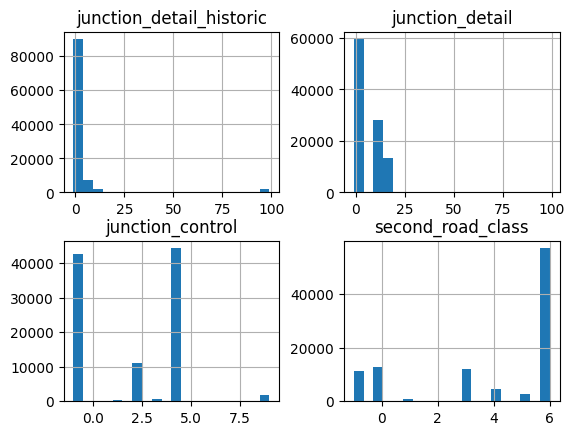

In [29]:
# Selecting the wanted columns (22 through 25)
uk_road_collision_data_2024.iloc[:, 22:26].hist(bins=20)

plt.show()

## Task 2: Entity Resolution

### Part 1
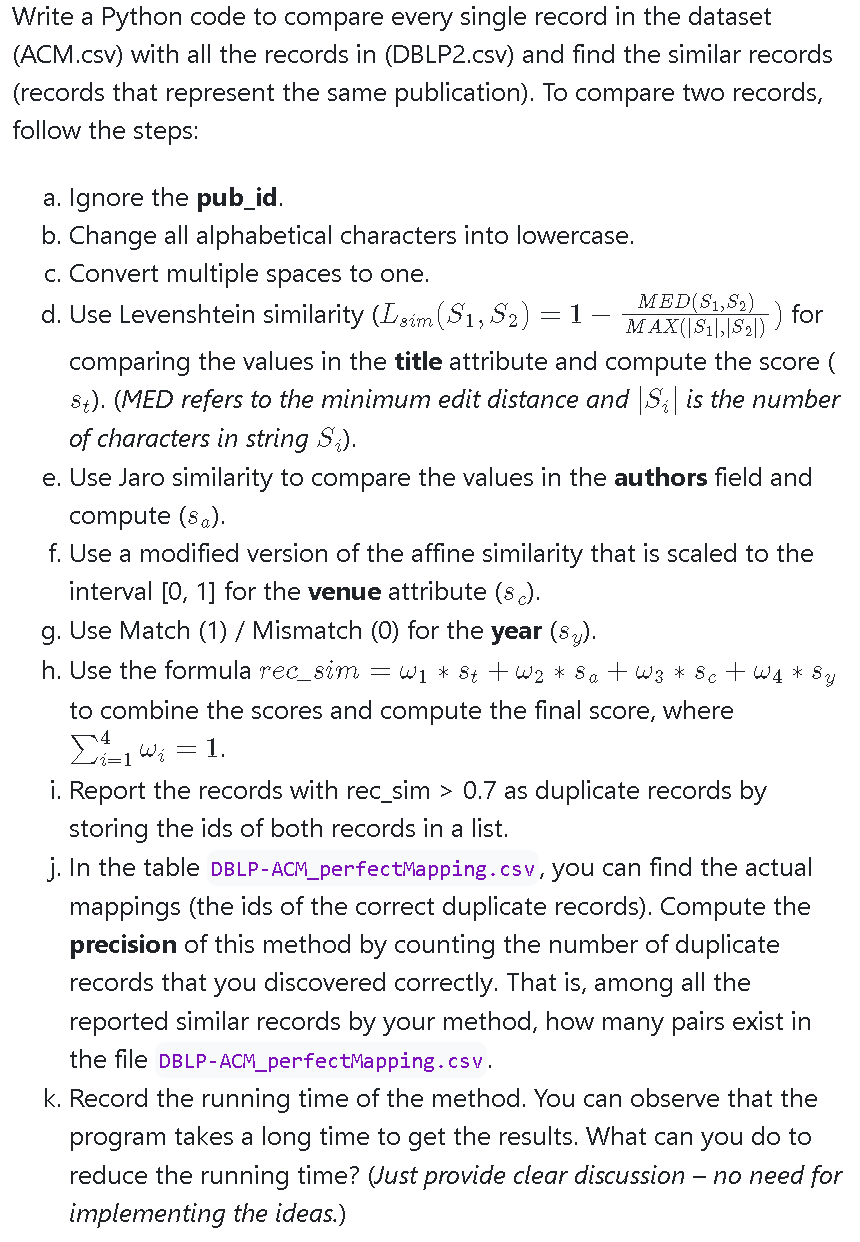

In [30]:
# Reading the data into Dataframes

df_acm = pd.read_csv('ACM.csv', header = 0)

# specify that the csv encoding type is 'latin1'
df_dblp = pd.read_csv('DBLP2.csv', header = 0, encoding = 'latin1')

df_mapping = pd.read_csv('DBLP-ACM_perfectMapping.csv', header = 0)

print("\033[1mACM dataset\033[0m")
display(df_acm.head(10))

print('\n')

print("\033[1mDBLP2 dataset\033[0m")
display(df_dblp.head(10))

ACM dataset


,id,title,authors,venue,year
0,304586,The WASA2 object-oriented workflow management ...,"Gottfried Vossen, Mathias Weske",International Conference on Management of Data,1999
1,304587,A user-centered interface for querying distrib...,"Isabel F. Cruz, Kimberly M. James",International Conference on Management of Data,1999
2,304589,"World Wide Database-integrating the Web, CORBA...","Athman Bouguettaya, Boualem Benatallah, Lily H...",International Conference on Management of Data,1999
3,304590,XML-based information mediation with MIX,"Chaitan Baru, Amarnath Gupta, Bertram Lud&#228...",International Conference on Management of Data,1999
4,304582,The CCUBE constraint object-oriented database ...,"Alexander Brodsky, Victor E. Segal, Jia Chen, ...",International Conference on Management of Data,1999
5,304583,The Cornell Jaguar project: adding mobility to...,"Phillippe Bonnet, Kyle Buza, Zhiyuan Chan, Vic...",International Conference on Management of Data,1999
6,304584,The active MultiSync controller of the cubetre...,"Nick Roussopoulos, Yannis Kotidis, Yannis Sism...",International Conference on Management of Data,1999
7,304585,The Jungle database search engine,"Michael B&#246;hlen, Linas Bukauskas, Curtis D...",International Conference on Management of Data,1999
8,306112,ADEPT: an agent-based approach to business pro...,"N. R. Jennings, T. J. Norman, P. Faratin",ACM SIGMOD Record,1998
9,306115,A componentized architecture for dynamic elect...,"Benny Reich, Israel Ben-Shaul",ACM SIGMOD Record,1998




DBLP2 dataset


,id,title,authors,venue,year
0,journals/sigmod/Mackay99,Semantic Integration of Environmental Models f...,D. Scott Mackay,SIGMOD Record,1999
1,conf/vldb/PoosalaI96,Estimation of Query-Result Distribution and it...,"Viswanath Poosala, Yannis E. Ioannidis",VLDB,1996
2,conf/vldb/PalpanasSCP02,Incremental Maintenance for Non-Distributive A...,"Themistoklis Palpanas, Richard Sidle, Hamid Pi...",VLDB,2002
3,conf/vldb/GardarinGT96,Cost-based Selection of Path Expression Proces...,"Zhao-Hui Tang, Georges Gardarin, Jean-Robert G...",VLDB,1996
4,conf/vldb/HoelS95,Benchmarking Spatial Join Operations with Spat...,"Erik G. Hoel, Hanan Samet",VLDB,1995
5,conf/sigmod/Keim99,Efficient Geometry-based Similarity Search of ...,Daniel A. Keim,SIGMOD Conference,1999
6,journals/sigmod/Ouksel02,Mining the World Wide Web: An Information Sear...,Aris M. Ouksel,SIGMOD Record,2002
7,journals/vldb/Seshadri98,Enhanced Abstract Data Types in Object-Relatio...,Praveen Seshadri,VLDB J.,1998
8,journals/sigmod/RamamrithamS97,Report on DART '96: Databases: Active and Real...,"Nandit Soparkar, Krithi Ramamritham",SIGMOD Record,1997
9,journals/sigmod/DAndreaJ96,UniSQL's Next-Generation Object-Relational Dat...,"Phil Janus, Albert D'Andrea",SIGMOD Record,1996


#### **a. Ignore the pub_id.**

In [31]:
df_acm_noID = df_acm.drop(columns = ['id'])

df_dblp_noID = df_dblp.drop(columns = ['id'])

print("\033[1mACM dataset (no 'id' column)\033[0m")
display(df_acm_noID.head(10))

print('\n')

print("\033[1mDBLP2 dataset ((no 'id' column)\033[0m")
display(df_dblp_noID.head(10))

ACM dataset (no 'id' column)


,title,authors,venue,year
0,The WASA2 object-oriented workflow management ...,"Gottfried Vossen, Mathias Weske",International Conference on Management of Data,1999
1,A user-centered interface for querying distrib...,"Isabel F. Cruz, Kimberly M. James",International Conference on Management of Data,1999
2,"World Wide Database-integrating the Web, CORBA...","Athman Bouguettaya, Boualem Benatallah, Lily H...",International Conference on Management of Data,1999
3,XML-based information mediation with MIX,"Chaitan Baru, Amarnath Gupta, Bertram Lud&#228...",International Conference on Management of Data,1999
4,The CCUBE constraint object-oriented database ...,"Alexander Brodsky, Victor E. Segal, Jia Chen, ...",International Conference on Management of Data,1999
5,The Cornell Jaguar project: adding mobility to...,"Phillippe Bonnet, Kyle Buza, Zhiyuan Chan, Vic...",International Conference on Management of Data,1999
6,The active MultiSync controller of the cubetre...,"Nick Roussopoulos, Yannis Kotidis, Yannis Sism...",International Conference on Management of Data,1999
7,The Jungle database search engine,"Michael B&#246;hlen, Linas Bukauskas, Curtis D...",International Conference on Management of Data,1999
8,ADEPT: an agent-based approach to business pro...,"N. R. Jennings, T. J. Norman, P. Faratin",ACM SIGMOD Record,1998
9,A componentized architecture for dynamic elect...,"Benny Reich, Israel Ben-Shaul",ACM SIGMOD Record,1998




DBLP2 dataset ((no 'id' column)


,title,authors,venue,year
0,Semantic Integration of Environmental Models f...,D. Scott Mackay,SIGMOD Record,1999
1,Estimation of Query-Result Distribution and it...,"Viswanath Poosala, Yannis E. Ioannidis",VLDB,1996
2,Incremental Maintenance for Non-Distributive A...,"Themistoklis Palpanas, Richard Sidle, Hamid Pi...",VLDB,2002
3,Cost-based Selection of Path Expression Proces...,"Zhao-Hui Tang, Georges Gardarin, Jean-Robert G...",VLDB,1996
4,Benchmarking Spatial Join Operations with Spat...,"Erik G. Hoel, Hanan Samet",VLDB,1995
5,Efficient Geometry-based Similarity Search of ...,Daniel A. Keim,SIGMOD Conference,1999
6,Mining the World Wide Web: An Information Sear...,Aris M. Ouksel,SIGMOD Record,2002
7,Enhanced Abstract Data Types in Object-Relatio...,Praveen Seshadri,VLDB J.,1998
8,Report on DART '96: Databases: Active and Real...,"Nandit Soparkar, Krithi Ramamritham",SIGMOD Record,1997
9,UniSQL's Next-Generation Object-Relational Dat...,"Phil Janus, Albert D'Andrea",SIGMOD Record,1996


#### **b. Change all alphabetical characters into lowercase.**


**AND**


#### **c. Convert multiple spaces to one.**

In [32]:
# Defining a data preparation function

def data_prep(df):
  """
  B: Converting all alphabetical characters into lowercase
  C: Converting multiple spaces (whitespace) into one
  Extra: Replacing all missing values with an empty string
  """
  # Ensuring that the upcoming code will only run for string-type columns
  for col in df.columns:
    if df.dtypes[col] != 'object':
      continue

    # Making everything lowercase
    df[col] = df[col].str.lower()

    # Removing all of the whitespaces
    df[col] = df[col].str.replace(r'\s+', ' ', regex = True)

    # Removing all of the NA values
    df[col] = df[col].fillna("")

  return df

df_acm_noID = data_prep(df_acm_noID)
df_dblp_noID = data_prep(df_dblp_noID)

print("\033[1mACM dataset\033[0m")
display(df_acm_noID.head(10))

print('\n')

print("\033[1mDBLP2 dataset\033[0m")
display(df_dblp_noID.head(10))

ACM dataset


,title,authors,venue,year
0,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999
1,a user-centered interface for querying distrib...,"isabel f. cruz, kimberly m. james",international conference on management of data,1999
2,"world wide database-integrating the web, corba...","athman bouguettaya, boualem benatallah, lily h...",international conference on management of data,1999
3,xml-based information mediation with mix,"chaitan baru, amarnath gupta, bertram lud&#228...",international conference on management of data,1999
4,the ccube constraint object-oriented database ...,"alexander brodsky, victor e. segal, jia chen, ...",international conference on management of data,1999
5,the cornell jaguar project: adding mobility to...,"phillippe bonnet, kyle buza, zhiyuan chan, vic...",international conference on management of data,1999
6,the active multisync controller of the cubetre...,"nick roussopoulos, yannis kotidis, yannis sism...",international conference on management of data,1999
7,the jungle database search engine,"michael b&#246;hlen, linas bukauskas, curtis d...",international conference on management of data,1999
8,adept: an agent-based approach to business pro...,"n. r. jennings, t. j. norman, p. faratin",acm sigmod record,1998
9,a componentized architecture for dynamic elect...,"benny reich, israel ben-shaul",acm sigmod record,1998




DBLP2 dataset


,title,authors,venue,year
0,semantic integration of environmental models f...,d. scott mackay,sigmod record,1999
1,estimation of query-result distribution and it...,"viswanath poosala, yannis e. ioannidis",vldb,1996
2,incremental maintenance for non-distributive a...,"themistoklis palpanas, richard sidle, hamid pi...",vldb,2002
3,cost-based selection of path expression proces...,"zhao-hui tang, georges gardarin, jean-robert g...",vldb,1996
4,benchmarking spatial join operations with spat...,"erik g. hoel, hanan samet",vldb,1995
5,efficient geometry-based similarity search of ...,daniel a. keim,sigmod conference,1999
6,mining the world wide web: an information sear...,aris m. ouksel,sigmod record,2002
7,enhanced abstract data types in object-relatio...,praveen seshadri,vldb j.,1998
8,report on dart '96: databases: active and real...,"nandit soparkar, krithi ramamritham",sigmod record,1997
9,unisql's next-generation object-relational dat...,"phil janus, albert d'andrea",sigmod record,1996


#### **d. Use Levenshtein similarity for comparing the values in the title attribute and compute the score.**

**AND**

#### **e. Use Jaro similarity to compare the values in the authors field.**

**AND**

#### **f. Use a modified version of the affine similarity that is scaled to the interval [0, 1] for the venue attribute.**

**AND**

#### **g. Use Match (1) / Mismatch (0) for the year.**

In [33]:
# Merging the datasets into one

df_merge = pd.merge(df_acm_noID, df_dblp_noID, how = 'cross')

print("\033[1mMerged dataset\033[0m")
display(df_merge.head(10))

# Changing columns names to more appropriate titles

df_merge.rename(columns = {
    'title_x': 'titleACM',
    'authors_x': 'authorsACM',
    'venue_x': 'venueACM',
    'year_x': 'yearACM',
    'title_y': 'titleDBLP',
    'authors_y': 'authorsDBLP',
    'venue_y': 'venueDBLP',
    'year_y': 'yearDBLP'}, inplace = True)

print('\n')

print("\033[1mMerged dataset (changed column titles)\033[0m")
display(df_merge.head(10))

Merged dataset


,title_x,authors_x,venue_x,year_x,title_y,authors_y,venue_y,year_y
0,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,semantic integration of environmental models f...,d. scott mackay,sigmod record,1999
1,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,estimation of query-result distribution and it...,"viswanath poosala, yannis e. ioannidis",vldb,1996
2,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,incremental maintenance for non-distributive a...,"themistoklis palpanas, richard sidle, hamid pi...",vldb,2002
3,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,cost-based selection of path expression proces...,"zhao-hui tang, georges gardarin, jean-robert g...",vldb,1996
4,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,benchmarking spatial join operations with spat...,"erik g. hoel, hanan samet",vldb,1995
5,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,efficient geometry-based similarity search of ...,daniel a. keim,sigmod conference,1999
6,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,mining the world wide web: an information sear...,aris m. ouksel,sigmod record,2002
7,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,enhanced abstract data types in object-relatio...,praveen seshadri,vldb j.,1998
8,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,report on dart '96: databases: active and real...,"nandit soparkar, krithi ramamritham",sigmod record,1997
9,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,unisql's next-generation object-relational dat...,"phil janus, albert d'andrea",sigmod record,1996




Merged dataset (changed column titles)


,titleACM,authorsACM,venueACM,yearACM,titleDBLP,authorsDBLP,venueDBLP,yearDBLP
0,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,semantic integration of environmental models f...,d. scott mackay,sigmod record,1999
1,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,estimation of query-result distribution and it...,"viswanath poosala, yannis e. ioannidis",vldb,1996
2,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,incremental maintenance for non-distributive a...,"themistoklis palpanas, richard sidle, hamid pi...",vldb,2002
3,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,cost-based selection of path expression proces...,"zhao-hui tang, georges gardarin, jean-robert g...",vldb,1996
4,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,benchmarking spatial join operations with spat...,"erik g. hoel, hanan samet",vldb,1995
5,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,efficient geometry-based similarity search of ...,daniel a. keim,sigmod conference,1999
6,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,mining the world wide web: an information sear...,aris m. ouksel,sigmod record,2002
7,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,enhanced abstract data types in object-relatio...,praveen seshadri,vldb j.,1998
8,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,report on dart '96: databases: active and real...,"nandit soparkar, krithi ramamritham",sigmod record,1997
9,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,unisql's next-generation object-relational dat...,"phil janus, albert d'andrea",sigmod record,1996


In [34]:
# Step G
def year_match(s, y):
  """
  Using Match (1) / Mismatch (0)
  coding to find similar years across
  the two datasets
  """
  if s == y:
    return 1
  else:
    return 0

In [35]:
# Steps D, E, F, and G: Similarity measures

def sim_measures(df):
  """
  Using py_stringmatching's built-in similarity score functions
  To answer points D to G
  D: Levenshtein similarity
  E: Jaro similarity
  F: Affine similarity (raw and normalised)
  G: Using the year_match() function
  """
  lev_sim = sm.Levenshtein()
  jaro_sim = sm.Jaro()
  aff_sim = sm.Affine()

  df['lev_sim'] = df_merge.apply(lambda col: lev_sim.get_sim_score(col['titleACM'], col['titleDBLP']), axis = 1)

  df['jaro_sim'] = df_merge.apply(lambda col: jaro_sim.get_sim_score(col['authorsACM'], col['authorsDBLP']), axis = 1)

  # Getting the raw score for the affine similarity
  df['aff_sim'] = df_merge.apply(lambda col: aff_sim.get_raw_score(col['venueACM'], col['venueDBLP']), axis = 1)

  df['year_sim'] = df_merge.apply(lambda col: year_match(col['yearACM'], col['yearDBLP']), axis = 1)

  # Transforming the affine similarity column by min-max scaling the results to the interval [0, 1]
  df['aff_sim'] = (df['aff_sim'] - df['aff_sim'].min()) / (df['aff_sim'].max() - df['aff_sim'].min())

  return df

#### * **Output of steps d through g** *

**AND**

#### **k. Record the running time of the method. You can observe that the program takes a long time to get the results. What can you do to reduce the running time? (Just provide clear discussion – no need for implementing the ideas.).**

In [36]:

# Recording the running time of the similarity score function
start = time.time()

# Executing the similarity measures function
df_sim = sim_measures(df_merge)

print("\033[1mMerged dataset with similarity scores\033[0m")
display(df_sim.head(10))

end = time.time()

Merged dataset with similarity scores


,titleACM,authorsACM,venueACM,yearACM,titleDBLP,authorsDBLP,venueDBLP,yearDBLP,lev_sim,jaro_sim,aff_sim,year_sim
0,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,semantic integration of environmental models f...,d. scott mackay,sigmod record,1999,0.245455,0.563082,0.450549,1
1,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,estimation of query-result distribution and it...,"viswanath poosala, yannis e. ioannidis",vldb,1996,0.197802,0.563950,0.274725,0
2,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,incremental maintenance for non-distributive a...,"themistoklis palpanas, richard sidle, hamid pi...",vldb,2002,0.218750,0.574531,0.274725,0
3,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,cost-based selection of path expression proces...,"zhao-hui tang, georges gardarin, jean-robert g...",vldb,1996,0.233333,0.571552,0.274725,0
4,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,benchmarking spatial join operations with spat...,"erik g. hoel, hanan samet",vldb,1995,0.107143,0.637252,0.274725,0
5,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,efficient geometry-based similarity search of ...,daniel a. keim,sigmod conference,1999,0.181818,0.545622,0.648352,1
6,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,mining the world wide web: an information sear...,aris m. ouksel,sigmod record,2002,0.211268,0.496245,0.450549,0
7,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,enhanced abstract data types in object-relatio...,praveen seshadri,vldb j.,1998,0.203390,0.601254,0.307692,0
8,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,report on dart '96: databases: active and real...,"nandit soparkar, krithi ramamritham",sigmod record,1997,0.236842,0.550162,0.450549,0
9,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,unisql's next-generation object-relational dat...,"phil janus, albert d'andrea",sigmod record,1996,0.449275,0.490044,0.450549,0


In [37]:
# Step K

# Displaying the running time
print(f"\033[1mTime taken to execute similarity scores:\033[0m {end - start:.2f} seconds")

Time taken to execute similarity scores: 2457.06 seconds


#### **h. Use the formula rec_sim to combine the scores and compute the final score.**

**AND**

#### **i. Report the records with rec_sim > 0.7 as duplicate records by storing the ids of both records in a list**

In [38]:
# Adding the 'id' column back into our dataset

df_merge_id = pd.merge(df_acm[['id']], df_dblp[['id']], how='cross')

# Renaming the columns to more appropriate names
df_merge_id.rename(columns={'id_x': 'idACM', 'id_y': 'idDBLP'}, inplace=True)

df_sim = pd.concat([df_sim.reset_index(drop=True),
                    df_merge_id.reset_index(drop=True)], axis=1)

print("\033[1mSimilarity score dataset with 'id' columns re-added\033[0m")
display(df_sim.head(10))

Similarity score dataset with 'id' columns re-added


,titleACM,authorsACM,venueACM,yearACM,titleDBLP,authorsDBLP,venueDBLP,yearDBLP,lev_sim,jaro_sim,aff_sim,year_sim,idACM,idDBLP
0,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,semantic integration of environmental models f...,d. scott mackay,sigmod record,1999,0.245455,0.563082,0.450549,1,304586,journals/sigmod/Mackay99
1,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,estimation of query-result distribution and it...,"viswanath poosala, yannis e. ioannidis",vldb,1996,0.197802,0.563950,0.274725,0,304586,conf/vldb/PoosalaI96
2,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,incremental maintenance for non-distributive a...,"themistoklis palpanas, richard sidle, hamid pi...",vldb,2002,0.218750,0.574531,0.274725,0,304586,conf/vldb/PalpanasSCP02
3,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,cost-based selection of path expression proces...,"zhao-hui tang, georges gardarin, jean-robert g...",vldb,1996,0.233333,0.571552,0.274725,0,304586,conf/vldb/GardarinGT96
4,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,benchmarking spatial join operations with spat...,"erik g. hoel, hanan samet",vldb,1995,0.107143,0.637252,0.274725,0,304586,conf/vldb/HoelS95
5,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,efficient geometry-based similarity search of ...,daniel a. keim,sigmod conference,1999,0.181818,0.545622,0.648352,1,304586,conf/sigmod/Keim99
6,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,mining the world wide web: an information sear...,aris m. ouksel,sigmod record,2002,0.211268,0.496245,0.450549,0,304586,journals/sigmod/Ouksel02
7,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,enhanced abstract data types in object-relatio...,praveen seshadri,vldb j.,1998,0.203390,0.601254,0.307692,0,304586,journals/vldb/Seshadri98
8,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,report on dart '96: databases: active and real...,"nandit soparkar, krithi ramamritham",sigmod record,1997,0.236842,0.550162,0.450549,0,304586,journals/sigmod/RamamrithamS97
9,the wasa2 object-oriented workflow management ...,"gottfried vossen, mathias weske",international conference on management of data,1999,unisql's next-generation object-relational dat...,"phil janus, albert d'andrea",sigmod record,1996,0.449275,0.490044,0.450549,0,304586,journals/sigmod/DAndreaJ96


In [39]:
# Viewing the distribution of unique values for each column

df_sim.nunique()

,0
titleACM,2216
authorsACM,2009
venueACM,5
yearACM,10
titleDBLP,2507
authorsDBLP,2316
venueDBLP,5
yearDBLP,10
lev_sim,3003
jaro_sim,412735


In [40]:
# Steps H and I: Similarity score for each record

def record_sim(df):
  """
  Using the results from the similarity scores
  from points D through G
  """
  s_t = df['lev_sim']
  s_a = df['jaro_sim']
  s_c = df['aff_sim']
  s_y = df['year_sim']

  # Defining our formula
  df['rec_sim'] = 0.45 * s_t + 0.45 * s_a + 0.05 * s_c + 0.05 * s_y

  return df

# Calling the function
record_sim(df_sim)

# Filter duplicates (rec_sim > 0.7)
duplicates = df_sim[df_sim['rec_sim'] > 0.7][['idACM', 'idDBLP']]

# Storing the duplicate records in a list
duplicate_pairs = duplicates.values.tolist()

print('\033[1mList of the ids of duplicate records with rec_sim > 0.7\033[0m')

print('\n')

display(duplicate_pairs)

List of the ids of duplicate records with rec_sim > 0.7




[[304586, 'conf/sigmod/VossenW99'],
 [304587, 'conf/sigmod/CruzJ99'],
 [304589, 'conf/sigmod/BouguettayaBH99'],
 [304590, 'conf/sigmod/BaruGLMPVC99'],
 [304582, 'conf/sigmod/BrodskySCE99'],
 [304583, 'conf/sigmod/BonnetBCCCHKMMOSS99'],
 [304584, 'conf/sigmod/RoussopoulosKS99'],
 [304585, 'conf/sigmod/BohlenBD99'],
 [306112, 'journals/sigmod/JenningsNF98'],
 [306115, 'journals/sigmod/ReichB98'],
 [306119, 'journals/sigmod/BollKB98'],
 [306124, 'journals/sigmod/BuchnerM98'],
 [306102, 'journals/sigmod/BichlerSZ98'],
 [306103, 'journals/sigmod/Danish98'],
 [306105, 'journals/sigmod/MeltzerC98'],
 [306109, 'journals/sigmod/DogacDATKCD98'],
 [304571, 'conf/sigmod/AltinelABFSZ99'],
 [304570, 'conf/sigmod/LiuHBPT99'],
 [304573, 'conf/sigmod/BraumandlKK99'],
 [304572, 'conf/sigmod/WolfsonSXZC99'],
 [304250, 'conf/sigmod/DoRD99'],
 [304248, 'conf/sigmod/BergstraesserBPS99'],
 [304569, 'conf/sigmod/TrisoliniLN99'],
 [304568, 'conf/sigmod/JarkeQBLMS99'],
 [304579, 'conf/sigmod/RundensteinerCLCZNJ

#### **j. Compute the precision of this method by counting the number of duplicate records that you discovered correctly. That is, among all the reported similar records by your method, how many pairs exist in the file DBLP-ACM_perfectMapping.csv.**

In [41]:
# Counting the number of duplicate records

# Convert the list to a tuple
predicted_pairs = set(map(tuple, duplicates.values))

# Mapping the true 'id' column values
true_pairs = set(map(tuple, df_mapping[['idACM', 'idDBLP']].values))

# Finding the intersection of predicted and true mappings
correct_matches = predicted_pairs & true_pairs

precision = len(correct_matches) / len(predicted_pairs) if predicted_pairs else 0

print(f"\033[1mPrecision:\033[0m {precision:.4f}")

print('\n')

print("\033[1mCorrectly discovered pairs:\033[0m")

print('\n')

display(correct_matches)

Precision: 0.8434


Correctly discovered pairs:




{(765534, 'journals/vldb/RoySSSA98'),
 (765526, 'journals/vldb/DesslochHMMT98'),
 (671172, 'conf/vldb/AbiteboulMRVW98'),
 (672833, 'conf/vldb/GoodmanRS94'),
 (253268, 'conf/sigmod/ONeilQ97'),
 (253352, 'conf/sigmod/QuassW97'),
 (673163, 'conf/vldb/RahmM95'),
 (673652, 'conf/vldb/BaumannFRW97'),
 (671200, 'conf/vldb/LakshmiZ98'),
 (568519, 'journals/tods/BrunoCG02'),
 (253406, 'conf/sigmod/WangSCRZP97'),
 (672008, 'conf/vldb/ChoenniV00'),
 (637414, 'journals/sigmod/SureSS02'),
 (304219, 'conf/sigmod/Keim99'),
 (671516, 'conf/vldb/GionisIM99'),
 (219042, 'journals/tods/FraternaliT95'),
 (765511, 'journals/vldb/BonczK99'),
 (604282, 'journals/sigmod/ShahMFH01'),
 (304585, 'conf/sigmod/BohlenBD99'),
 (276361, 'conf/sigmod/RamakrishnanD98'),
 (375688, 'conf/sigmod/ChenGM01'),
 (375718, 'conf/sigmod/LazaridisM01'),
 (872765, 'conf/sigmod/DasGR03'),
 (671032, 'conf/vldb/George98'),
 (641270, 'journals/vldb/AnGSVKI02'),
 (671680, 'conf/vldb/Brodie00'),
 (945741, 'journals/sigmod/Anisimov03'),


### Part 2
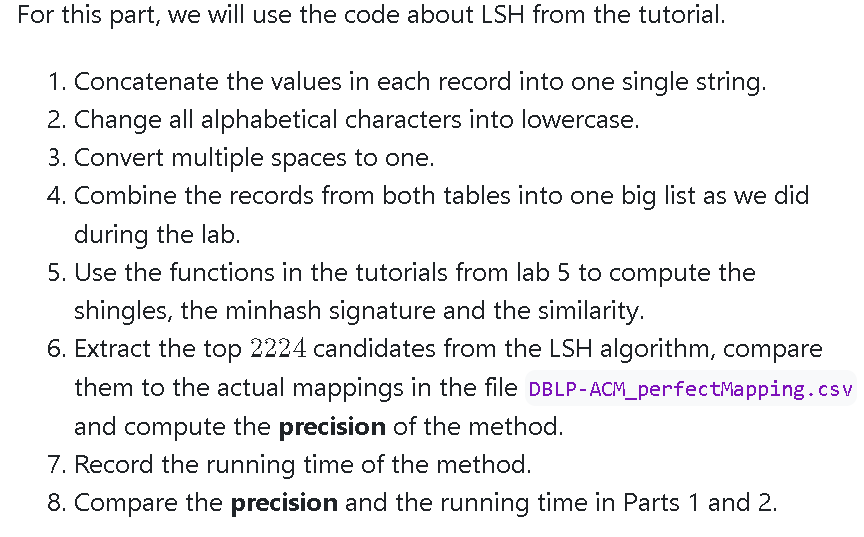

In [42]:
# Loading the DBLP2 and ACM datasets

dblp = pd.read_csv("DBLP2.csv", header = 0, encoding = 'latin1')
acm = pd.read_csv("ACM.csv",header = 0)
perfect_mapping = pd.read_csv("DBLP-ACM_perfectMapping.csv")


print("\033[1mDBLP2 dataset\033[0m")
display(dblp.head(10))

print('\n')

print("\033[1mACM dataset\033[0m")
display(acm.head(10))

print('\n')

print("\033[1mPerfect Mapping dataset\033[0m")
display(perfect_mapping.head(10))


DBLP2 dataset


,id,title,authors,venue,year
0,journals/sigmod/Mackay99,Semantic Integration of Environmental Models f...,D. Scott Mackay,SIGMOD Record,1999
1,conf/vldb/PoosalaI96,Estimation of Query-Result Distribution and it...,"Viswanath Poosala, Yannis E. Ioannidis",VLDB,1996
2,conf/vldb/PalpanasSCP02,Incremental Maintenance for Non-Distributive A...,"Themistoklis Palpanas, Richard Sidle, Hamid Pi...",VLDB,2002
3,conf/vldb/GardarinGT96,Cost-based Selection of Path Expression Proces...,"Zhao-Hui Tang, Georges Gardarin, Jean-Robert G...",VLDB,1996
4,conf/vldb/HoelS95,Benchmarking Spatial Join Operations with Spat...,"Erik G. Hoel, Hanan Samet",VLDB,1995
5,conf/sigmod/Keim99,Efficient Geometry-based Similarity Search of ...,Daniel A. Keim,SIGMOD Conference,1999
6,journals/sigmod/Ouksel02,Mining the World Wide Web: An Information Sear...,Aris M. Ouksel,SIGMOD Record,2002
7,journals/vldb/Seshadri98,Enhanced Abstract Data Types in Object-Relatio...,Praveen Seshadri,VLDB J.,1998
8,journals/sigmod/RamamrithamS97,Report on DART '96: Databases: Active and Real...,"Nandit Soparkar, Krithi Ramamritham",SIGMOD Record,1997
9,journals/sigmod/DAndreaJ96,UniSQL's Next-Generation Object-Relational Dat...,"Phil Janus, Albert D'Andrea",SIGMOD Record,1996




ACM dataset


,id,title,authors,venue,year
0,304586,The WASA2 object-oriented workflow management ...,"Gottfried Vossen, Mathias Weske",International Conference on Management of Data,1999
1,304587,A user-centered interface for querying distrib...,"Isabel F. Cruz, Kimberly M. James",International Conference on Management of Data,1999
2,304589,"World Wide Database-integrating the Web, CORBA...","Athman Bouguettaya, Boualem Benatallah, Lily H...",International Conference on Management of Data,1999
3,304590,XML-based information mediation with MIX,"Chaitan Baru, Amarnath Gupta, Bertram Lud&#228...",International Conference on Management of Data,1999
4,304582,The CCUBE constraint object-oriented database ...,"Alexander Brodsky, Victor E. Segal, Jia Chen, ...",International Conference on Management of Data,1999
5,304583,The Cornell Jaguar project: adding mobility to...,"Phillippe Bonnet, Kyle Buza, Zhiyuan Chan, Vic...",International Conference on Management of Data,1999
6,304584,The active MultiSync controller of the cubetre...,"Nick Roussopoulos, Yannis Kotidis, Yannis Sism...",International Conference on Management of Data,1999
7,304585,The Jungle database search engine,"Michael B&#246;hlen, Linas Bukauskas, Curtis D...",International Conference on Management of Data,1999
8,306112,ADEPT: an agent-based approach to business pro...,"N. R. Jennings, T. J. Norman, P. Faratin",ACM SIGMOD Record,1998
9,306115,A componentized architecture for dynamic elect...,"Benny Reich, Israel Ben-Shaul",ACM SIGMOD Record,1998




Perfect Mapping dataset


,idDBLP,idACM
0,conf/sigmod/SlivinskasJS01,375678
1,conf/sigmod/ChaudhuriDN01,375694
2,conf/sigmod/RinfretOO01,375669
3,conf/sigmod/BreunigKKS01,375672
4,conf/sigmod/JagadishJOT01,375687
5,conf/sigmod/NazeriBO01,375743
6,conf/sigmod/ChenZCKR01,375789
7,conf/sigmod/BohmBKK01,375714
8,conf/sigmod/DattaDRTV01,375780
9,conf/sigmod/HernandezMHYHT01,375767


#### **1. Concatenate the values in each record into one single string.**

**AND**

#### **2. Change all alphabetical characters into lowercase.**

**AND**

#### **3. Convert multiple spaces into one.**

In [43]:
# Preprocessing the text data and concat fields in 1 string per record

def normalize_text(s):
    if pd.isna(s):
        return ""

    # Turning all text lowercase
    s = s.lower()

    # Removing all whitespaces
    s = re.sub(r'\s+', ' ', s.strip())
    return s

# Applying normalisation
for df in [dblp, acm]:
    df['title'] = df['title'].apply(normalize_text)
    df['authors'] = df['authors'].apply(normalize_text)
    df['venue'] = df['venue'].apply(normalize_text)
    df['year'] = df['year'].astype(str).apply(normalize_text)
    df['combined'] = df['title'] + " " + df['authors'] + " " + df['venue'] + " " + df['year']

#quesiton"Combine the records from both tables into one big list"
dblp['source'] = 'DBLP'
acm['source'] = 'ACM'
combined_df = pd.concat([dblp, acm], ignore_index=True)

print("\033[1mTotal combined records are:\033[0m", len(combined_df))
combined_df.head()


Total combined records are: 4910


,id,title,authors,venue,year,combined,source
0,journals/sigmod/Mackay99,semantic integration of environmental models f...,d. scott mackay,sigmod record,1999,semantic integration of environmental models f...,DBLP
1,conf/vldb/PoosalaI96,estimation of query-result distribution and it...,"viswanath poosala, yannis e. ioannidis",vldb,1996,estimation of query-result distribution and it...,DBLP
2,conf/vldb/PalpanasSCP02,incremental maintenance for non-distributive a...,"themistoklis palpanas, richard sidle, hamid pi...",vldb,2002,incremental maintenance for non-distributive a...,DBLP
3,conf/vldb/GardarinGT96,cost-based selection of path expression proces...,"zhao-hui tang, georges gardarin, jean-robert g...",vldb,1996,cost-based selection of path expression proces...,DBLP
4,conf/vldb/HoelS95,benchmarking spatial join operations with spat...,"erik g. hoel, hanan samet",vldb,1995,benchmarking spatial join operations with spat...,DBLP


#### **4. Combine the records from both tables into one big list.**

In [44]:
dblp['source'] = 'DBLP'
acm['source'] = 'ACM'
combined_df = pd.concat([dblp, acm], ignore_index=True)

print("\033[1mTotal combined records are:\033[0m", len(combined_df))
combined_df.head()

Total combined records are: 4910


,id,title,authors,venue,year,combined,source
0,journals/sigmod/Mackay99,semantic integration of environmental models f...,d. scott mackay,sigmod record,1999,semantic integration of environmental models f...,DBLP
1,conf/vldb/PoosalaI96,estimation of query-result distribution and it...,"viswanath poosala, yannis e. ioannidis",vldb,1996,estimation of query-result distribution and it...,DBLP
2,conf/vldb/PalpanasSCP02,incremental maintenance for non-distributive a...,"themistoklis palpanas, richard sidle, hamid pi...",vldb,2002,incremental maintenance for non-distributive a...,DBLP
3,conf/vldb/GardarinGT96,cost-based selection of path expression proces...,"zhao-hui tang, georges gardarin, jean-robert g...",vldb,1996,cost-based selection of path expression proces...,DBLP
4,conf/vldb/HoelS95,benchmarking spatial join operations with spat...,"erik g. hoel, hanan samet",vldb,1995,benchmarking spatial join operations with spat...,DBLP


#### **5. Use the functions in the tutorials from lab 5 to compute the shingles, the minhash signature and the similarity.**

**AND**

#### **6. Extract the top candidates from the LSH algorithm, compare them to the actual mappings in the file DBLP-ACM_perfectMapping.csv and compute the precision of the method.**

**AND**

#### **7. Record the running time of the method.**

In [45]:
# Step 1: Compute shingles
def get_shingles(text, k=2):
    return set([text[i:i+k] for i in range(max(len(text) - k + 1, 1))])


# Step 2: Compute minhash signatures
def get_minhash_signature(text, num_perm=100):
    shingles = get_shingles(text)
    signature = []
    for i in range(num_perm):
        hashes = [hash(s + str(i)) % (10**8) for s in shingles]
        signature.append(min(hashes))
    return np.array(signature)


# Step 3: Split signatures into bands
def split_into_bands(signature, b):
    r = len(signature) // b
    assert len(signature) % b == 0, "Signature length must be divisible by number of bands"
    return [tuple(signature[i*r:(i+1)*r]) for i in range(b)]


# Step 4: Manual LSH implementation
class ManualLSH:
    def __init__(self, b):
        self.b = b
        self.buckets = [dict() for _ in range(b)]
        self.counter = 0

    def add_signature(self, signature):
        bands = split_into_bands(signature, self.b)
        for i, band in enumerate(bands):
            band_hash = hash(band)
            if band_hash not in self.buckets[i]:
                self.buckets[i][band_hash] = []
            self.buckets[i][band_hash].append(self.counter)
        self.counter += 1

    def get_candidates(self):
        candidates = set()
        for bucket_band in self.buckets:
            for ids in bucket_band.values():
                if len(ids) > 1:
                    for pair in combinations(ids, 2):
                        candidates.add(tuple(sorted(pair)))
        return candidates


# Step 5: Combine both datasets into one list
sentences = combined_df['combined'].tolist()
print("\033[1mTotal number of sentences (documents):\033[0m", len(sentences))
print("\033[1mExample sentence:\033[0m", sentences[0][:150], "...")


# Step 6: Apply LSH and compute Jaccard similarity
start_time = time.time()

# Generate minhash signatures
num_perm = 100
signatures = [get_minhash_signature(text, num_perm) for text in sentences]

# Initialise LSH
b = 10
lsh = ManualLSH(b)

# Add all signatures to LSH
for sig in signatures:
    lsh.add_signature(sig)

# Get candidate pairs (potential duplicates)
candidate_pairs = lsh.get_candidates()
print("\033[1mNumber of candidate pairs:\033[0m", len(candidate_pairs))

# Select only the top 2224 candidate pairs
candidate_pairs = list(candidate_pairs)[:2224]
print("\033[1mNumber of candidate pairs after selecting top 2224:\033[0m", len(candidate_pairs))


# Compute explicit Jaccard similarity for each pair
def compute_minhash_similarity(sig1, sig2):
    """Compute the Jaccard similarity approximation between two min-hash signatures."""
    return np.mean(sig1 == sig2)


# Filter candidate pairs with similarity > 0.7 (threshold)
similar_pairs = set()
for i, j in candidate_pairs:
    sim = compute_minhash_similarity(signatures[i], signatures[j])
    if sim > 0.7:
        similar_pairs.add((i, j))

print("\033[1mNumber of similar pairs (Jaccard > 0.7):\033[0m", len(similar_pairs))


# Step 7: Compute precision using perfect mapping
dblp_id_to_index = {row['id']: idx for idx, row in combined_df[combined_df['source'] == 'DBLP'].iterrows()}
acm_id_to_index = {row['id']: idx for idx, row in combined_df[combined_df['source'] == 'ACM'].iterrows()}

true_pairs = set()
for _, row in perfect_mapping.iterrows():
    if row['idDBLP'] in dblp_id_to_index and row['idACM'] in acm_id_to_index:
        i = dblp_id_to_index[row['idDBLP']]
        j = acm_id_to_index[row['idACM']]
        true_pairs.add(tuple(sorted((i, j))))

true_positives = len(similar_pairs.intersection(true_pairs))
precision = true_positives / len(similar_pairs) if similar_pairs else 0

end_time = time.time()
runtime = end_time - start_time

print("\033[1mTrue positives:\033[0m", true_positives)
print("\033[1mPrecision (with Jaccard):\033[0m", round(precision, 3))
print("\033[1mRuntime (seconds):\033[0m", round(runtime, 2))


Total number of sentences (documents): 4910
Example sentence: semantic integration of environmental models for application to global information systems and decision-making d. scott mackay sigmod record 1999 ...
Number of candidate pairs: 2620
Number of candidate pairs after selecting top 2224: 2224
Number of similar pairs (Jaccard > 0.7): 1701
True positives: 1210
Precision (with Jaccard): 0.711
Runtime (seconds): 17.62


## Task 3: Data Preparation
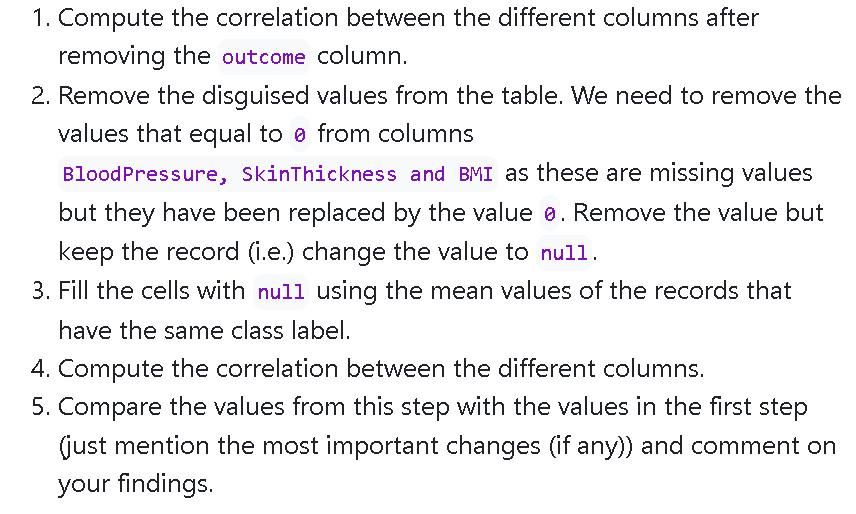

#### **1. Compute the correlation between the different columns after removing the outcome column.**

In [46]:
# Reading in the diabetes data
df_pid = pd.read_csv('diabetes.csv', header = 0,
                 quotechar = '"',sep = ",",
                 na_values = ['na', '-', '.', ''])

print("\033[1mDiabetes dataset\033[0m")
display(df_pid)

Diabetes dataset


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [47]:
# Look into data and see how many unique values in BloodPressure, SkinThickness, BMI
df_pid.info()

print('\n')

print("\033[1mUnique values\033[0m")
df_pid.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Unique values


,0
Pregnancies,17
Glucose,136
BloodPressure,47
SkinThickness,51
Insulin,186
BMI,248
DiabetesPedigreeFunction,517
Age,52
Outcome,2


In [48]:
# Drop column 'Outcome'

df_pid_no = df_pid.drop('Outcome', axis=1)

print("\033[1mDiabetes dataset without the 'Outcome' column\033[0m")
display(df_pid_no)

Diabetes dataset without the 'Outcome' column


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [49]:
# Compute the correlation without the 'Outcome' column
correlation_no = df_pid_no.corr()

print("\033[1mCorrelation without the 'Outcome' column\033[0m")
display(correlation_no)

Correlation without the 'Outcome' column


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


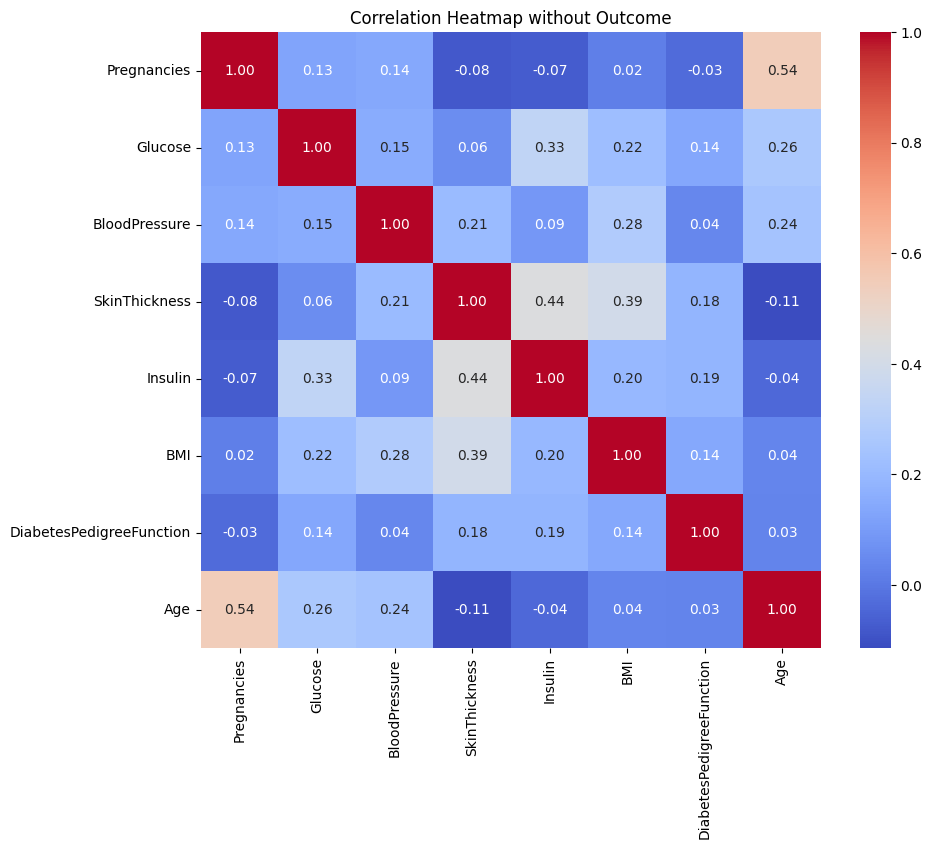

In [50]:
# Visualising the correlation without the 'Outcome' column
plt.figure(figsize=(10,8))

# visualising the data using a heatmap
sns.heatmap(correlation_no, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap without Outcome')

plt.show()

#### **2. Remove the disguised values from the table. We need to remove the values that equal to 0 from columns BloodPressure, SkinThickness and BMI as these are missing values but they have been replaced by the value 0. Remove the value but keep the record (i.e.) change the value to null.**

In [51]:
# Replacing 0 in BloodPressure, SkinThickness, BMI with null
df_pid['BloodPressure'] = df_pid['BloodPressure'].replace(0, np.NaN)

df_pid['SkinThickness'] = df_pid['SkinThickness'].replace(0, np.NaN)

df_pid['BMI'] = df_pid['BMI'].replace(0, np.NaN)

#### **3. Fill the cells with null using the mean values of the records that have the same class label.**

In [52]:
for col in df_pid:
    mean_val0 = df_pid.loc[df_pid["Outcome"] == 0, col].mean()
    mean_val1 = df_pid.loc[df_pid["Outcome"] == 1, col].mean()
    df_pid.loc[(df_pid["Outcome"] == 0) & (df_pid[col].isna()), col] = mean_val0
    df_pid.loc[(df_pid["Outcome"] == 1) & (df_pid[col].isna()), col] = mean_val1

/tmp/ipython-input-3778441299.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '3.298' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_pid.loc[(df_pid["Outcome"] == 0) & (df_pid[col].isna()), col] = mean_val0
/tmp/ipython-input-3778441299.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '109.98' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_pid.loc[(df_pid["Outcome"] == 0) & (df_pid[col].isna()), col] = mean_val0
/tmp/ipython-input-3778441299.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '68.792' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_pid.loc[(df_pid["Outcome"] == 0) & (df_pid[col].isna()), c

#### **4. Compute the correlation between different columns.**

In [53]:
# Compute correlation with Outcome
correlation = df_pid.corr()

print("\033[1mCorrelation with the 'Outcome' column\033[0m")
display(correlation)

Correlation with the 'Outcome' column


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.208935,0.094172,-0.073535,0.024127,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.222417,0.220943,0.331357,0.219879,0.137337,0.263514,0.466581
BloodPressure,0.208935,0.222417,1.000000,0.203453,-0.048106,0.286518,-0.002264,0.324439,0.175087
SkinThickness,0.094172,0.220943,0.203453,1.000000,0.104017,0.565443,0.102426,0.135916,0.308094
Insulin,-0.073535,0.331357,-0.048106,0.104017,1.000000,0.185545,0.185071,-0.042163,0.130548
BMI,0.024127,0.219879,0.286518,0.565443,0.185545,1.000000,0.152530,0.027578,0.315271
DiabetesPedigreeFunction,-0.033523,0.137337,-0.002264,0.102426,0.185071,0.152530,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.324439,0.135916,-0.042163,0.027578,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.175087,0.308094,0.130548,0.315271,0.173844,0.238356,1.000000


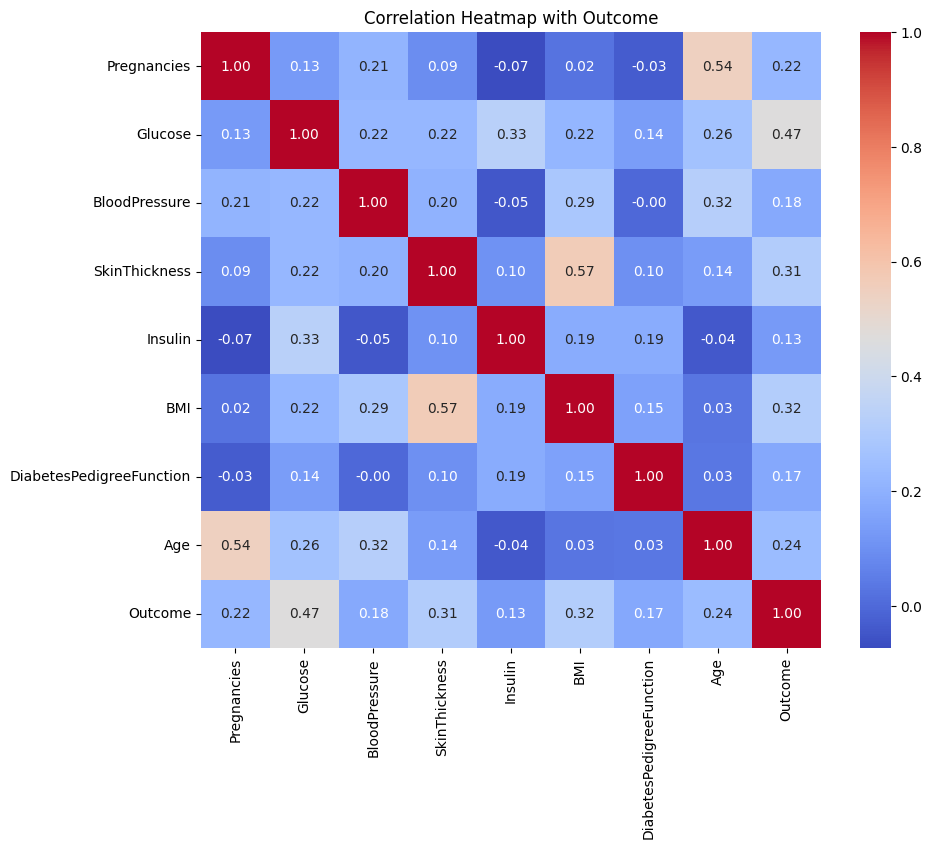

In [54]:
# Visualize correlation with Outcome
plt.figure(figsize=(10,8))

sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")

plt.title('Correlation Heatmap with Outcome')
plt.show()

#### **5. Compare the values from this step with the values in the first step (just mention the most important changes (if any)) and comment on your findings.**

In [55]:
# Combine correlation with and without Outcome
comparison = pd.concat([correlation_no,correlation],axis=1)

print("\033[1mComparison of the correlation with and without the 'Outcome' column\033[0m")
display(comparison)

Comparison of the correlation with and without the 'Outcome' column


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,1.000000,0.129459,0.208935,0.094172,-0.073535,0.024127,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.129459,1.000000,0.222417,0.220943,0.331357,0.219879,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.208935,0.222417,1.000000,0.203453,-0.048106,0.286518,-0.002264,0.324439,0.175087
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.094172,0.220943,0.203453,1.000000,0.104017,0.565443,0.102426,0.135916,0.308094
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,-0.073535,0.331357,-0.048106,0.104017,1.000000,0.185545,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.024127,0.219879,0.286518,0.565443,0.185545,1.000000,0.152530,0.027578,0.315271
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,-0.033523,0.137337,-0.002264,0.102426,0.185071,0.152530,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.544341,0.263514,0.324439,0.135916,-0.042163,0.027578,0.033561,1.000000,0.238356
Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.221898,0.466581,0.175087,0.308094,0.130548,0.315271,0.173844,0.238356,1.000000


In [56]:
# Comparison of BloodPressure, SkinTickness, BMI with other variables
comparison_with_step1 = comparison.loc[['BloodPressure','SkinThickness','BMI','Outcome']]

print("\033[1mComparison of the correlation with and without the 'Outcome' column\033[0m")
display(comparison_with_step1)

Comparison of the correlation with and without the 'Outcome' column


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.208935,0.222417,1.000000,0.203453,-0.048106,0.286518,-0.002264,0.324439,0.175087
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.094172,0.220943,0.203453,1.000000,0.104017,0.565443,0.102426,0.135916,0.308094
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.024127,0.219879,0.286518,0.565443,0.185545,1.000000,0.152530,0.027578,0.315271
Outcome,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.221898,0.466581,0.175087,0.308094,0.130548,0.315271,0.173844,0.238356,1.000000
